# Random Forest

Como esta documentado y de acuerdo a lo que he entendido, Random forest tiene una mejor calidad de predicción que un solo árbol eficientemente construido y bien podado. 

## Bagging (Bootstrap Aggregating)

- Bagging genera clasificadores de varias muestras de los ejemplos
- Funciona especialmente para algoritmos de aprendizaje inestables (cambian mucho sus estructuras al cambiar un poco los ejemplos), por ejemplo, los árboles de decisión
- El error de combinar varios clasificadores se explica por lo que se conoce como bias-variance decomposition. El sesgo (bias) de cada clasificador está dado por su error intrínseco y mide qué tan bien un clasificador explica el problema. La varianza está dada por los datos que se usan para construir el modelo.
- El error esperado total de clasificación está dado por la suma del sesgo y la varianza. Al combinar múltiples clasificadores se reduce el error esperado al reducir la varianza
- En la práctica un problema es que existe un solo conjunto de entrenamiento y puede no ser fácil obtener más
- Una muestra de ejemplos _bootstrap_ se genera al muestrear uniformemente _m_ instancias del conjunto de entrenamiento con reemplazo.
- Bagging también se puede usar para clases con valores continuos, la diferencia es que la salida de los clasificadores se promedia. En este caso se reduce el valor esperado del error cuadrático medio.
- En general, se puede mejorar el resultado si se quita la opción de podado en los árboles de decisión, lo que los hace más inestables.
- Si los modelos nos regresan probabilidades, hace sentido combinar estas probabilidades, y lo que nos regresa _Bagging_ es una probabilidad.
- Los resultados de bagging, como ya lo mencionamos, son dif ́ıciles de interpretar.
- La idea es construir un ensamble de clasificadores usando Bagging, usar la clasificación producida por el ensamble para re-etiquetar todos los datos y después aprender un clasificador único con esa re-etiquetación
- El re-etiquetado de cada ejemplo se hace tratando de minimizar un costo esperado obtenido de las probabilidades arrojadas por _bagging_. Al final se obtiene un nuevo clasificador único que toma en cuentan los costos que ya se pusieron en las etiquetas.




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.cross_validation import train_test_split, cross_val_score # Removida
from sklearn.model_selection import train_test_split, cross_val_score
#from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-white')

In [3]:
boston_df = pd.read_csv('data/Boston.csv')
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [4]:
X = boston_df.drop('medv', axis=1)
y = boston_df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, test_size=0.4, random_state=0)

# Pruning not supported. Choosing max depth 3)
# regr2 = DecisionTreeRegressor(max_depth=3)
# regr2.fit(X_train, y_train)
# pred = regr2.predict(X_test)
# graph = print_tree(regr2, features=X.columns)
# Image(graph.create_png())
# plt.scatter(pred, y_test, label='medv')
# plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
# plt.xlabel('pred')
# plt.ylabel('y_test')
#mean_squared_error(y_test, pred)

In [5]:
# Hay 13 atributos o predictores en el juego de datos o dataset
X.shape

(506, 13)

In [6]:
# Bagging: using all features
regr1 = RandomForestRegressor(max_features=13, random_state=1)
regr1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=13, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

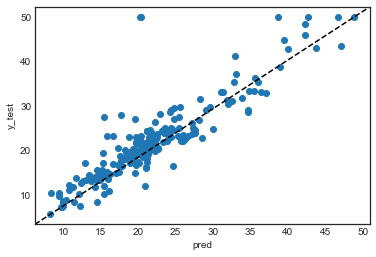

In [7]:
pred = regr1.predict(X_test)

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [8]:
mean_squared_error(y_test, pred)

18.237273399014782

In [9]:
# Random forests: using 6 features
regr2 = RandomForestRegressor(max_features=6, random_state=1)
regr2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [10]:
pred = regr2.predict(X_test)
mean_squared_error(y_test, pred)

20.10302857142857

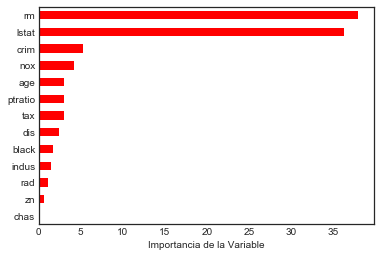

In [11]:
Importance = pd.DataFrame({'Importancia':regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importancia', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Importancia de la Variable')
plt.gca().legend_ = None

Buscamos el mejor valor para el número de atributos a considerar para realizar la división. Los valores usados para evaluar el parametro max_features estarán entre 1 y 13.

MSE:  12.5270882778
oob_score:  0.824359547326


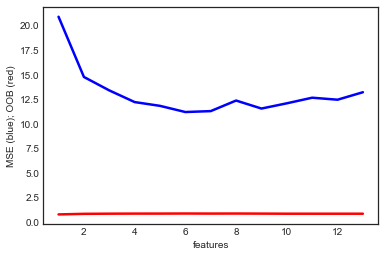

In [13]:
#X = boston_df[boston_df.columns[:-1]].values
#y = boston_df["medv"].values
Xr, Xt, yr, yt = train_test_split(X_train, y_train, train_size=0.7, test_size=0.3, random_state=42)

# Entrenar el random forest
reg = RandomForestRegressor(n_estimators=500, oob_score=True)
reg.fit(Xr, yr)
ypred = reg.predict(Xt)
print("MSE: ",mean_squared_error(yt, ypred))
print("oob_score: ",reg.oob_score_)

oob_scores = []
mses = []
num_feats = range(1, 14)
for num_feat in num_feats:
    reg = RandomForestRegressor(n_estimators=500, max_features=num_feat, oob_score=True)
    reg.fit(Xr, yr)
    ypred = reg.predict(Xt)
    mses.append(mean_squared_error(yt, ypred))
    oob_scores.append(reg.oob_score_)
plt.plot(num_feats, mses, color='b', linewidth=2.5)
plt.plot(num_feats, oob_scores, color='r', linewidth=2.5)
plt.xlabel("features")
plt.ylabel("MSE (blue); OOB (red)")

## Ejemplo con los datos del Titanic
La primera meta debería ser siempre conseguir una predicción generalizada tan rapido como sea posible.
Para llevar a cabo el ejercicio de Random Forest, utilizaremos los datos del Titanic.

In [29]:
# Cargamos las librerías necesarias
# from sklearn.ensemble import RandomForestRegressor
# La metrica del error. En este caso, se utilizará c-stat (tambien conocido como ROC/AUC)
from sklearn.metrics import roc_auc_score
# Importamos los datos
X = pd.read_csv("data/titanic.csv")
y = X.pop("survived")

X.describe()

           pclass         age       sibsp       parch        fare
count  891.000000  714.000000  891.000000  891.000000  891.000000
mean     2.308642   29.699118    0.523008    0.381594   32.204208
std      0.836071   14.526497    1.102743    0.806057   49.693429
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000   20.125000    0.000000    0.000000    7.910400
50%      3.000000   28.000000    0.000000    0.000000   14.454200
75%      3.000000   38.000000    1.000000    0.000000   31.000000
max      3.000000   80.000000    8.000000    6.000000  512.329200

Se sabe que hay variables categoricas en el juego de datos, pero se omitiran por el momento, para ir mas rápido.
Estas se incluiran en los pasos posteriores a medida que se vaya mejorando el modelo

In [32]:
# De igual modo sabemos que hay datos nulos o faltantes, por ejemplo para el caso de la edad o predictor "Age"
# Procedemos a completar los valores faltantes con la media de la muestra
X["age"].fillna(X.age.mean(), inplace=True)
# Verificamos los datos de nuevo que esten correctos (Count en Age debe ser igual que todos)
X.describe()

           pclass         age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean     2.308642   29.699118    0.523008    0.381594   32.204208
std      0.836071   13.002015    1.102743    0.806057   49.693429
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000   22.000000    0.000000    0.000000    7.910400
50%      3.000000   29.699118    0.000000    0.000000   14.454200
75%      3.000000   35.000000    1.000000    0.000000   31.000000
max      3.000000   80.000000    8.000000    6.000000  512.329200

In [33]:
# Obtenemos las variables númericas seleccionando solamente las variables que no son de tipo "object"
X.info() # Muestra los tipos de datos
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         891 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


   pclass   age  sibsp  parch     fare
0       3  22.0      1      0   7.2500
1       1  38.0      1      0  71.2833
2       3  26.0      0      0   7.9250
3       1  35.0      1      0  53.1000
4       3  35.0      0      0   8.0500

In [37]:
# Contruir el primer modelo lo mas sencillo posible, luego iremos incrementando la dificultad y precisión.
# Aqui usaremos la opción del clasificador oob_score=True, Es una buena idea incrementar el numero de estimadores n_estimators
# a un numero mayor que el valor por defecto. 
# En este caso en particular el oob_predictions sera basado sobre un bosque de 33 arboles. Se ajustao el random_state=42 para 
# que se pueda replicar el modelo exactamente
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
# Usaremos variables númericas por el momento, las categoricas debemos transformarlas luego
model.fit(X[numeric_variables], y)

# Para la Regresión, el atributo oob_score_ ofrece el R^2 basado sobre el oob_predictions. 
# En sciki-learn los atributos con el underscore o barra al piso al final, solo aparecen despues de ajustar el modelo
model.oob_score_

0.06921312163490756

In [38]:
#
y_oob = model.oob_prediction_
print("c-stat: ", roc_auc_score(y, y_oob))

c-stat:  0.726259333823


In [39]:
# Ya tenemos una marca para empezar; como puede verse el resultado no es muy bueno para nuestro juego de datos; sin embargo,
# nos da un punto de inicio para empezar a mejorar nuestro modelo. 
# Antes de cambiar parametros en el clasificador de Random Forest de scikit-learn, prepararemos los datos para que puedan ser 
# utilizados sin inconvenientes

# Función para mostrar las estadisticas descriptivas de las variables categóricas
def describe_categorical(X):
    """
    Similar a .describe() de pandas, pero devulve los resultados para variables categóricas unicamente
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes== "object"]].describe().to_html()))

#
describe_categorical(X)

,name,sex,ticket,cabin,embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Palsson, Master. Gosta Leonard",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [45]:
# Eliminamos las variables que no queremos tratar en el modelo
X.drop(["name", "ticket"], axis=1, inplace=True)

# Cambiamos la variable "Cabin" para que solo tome la primer letra o None
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"

# 
X["cabin"] = X.cabin.apply(clean_cabin)

In [46]:
#
categorical_variables = ['sex', 'cabin', 'embarked']

for variable in categorical_variables:
    # Llenar los valores faltantes con la palabra "Missing"
    X[variable].fillna("Missing", inplace=True)
    # Crear variables dummy
    dummies = pd.get_dummies(X[variable], prefix=variable)
    # Update X para incluir las dummies y eliminar la variable principal
    X = pd.concat([X, dummies], axis=1)
    X.drop([variable], axis=1, inplace=True)

# Observar todas las columnas en el juego de datos
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))

# Imprimir observaciones del juego de datos
printall(X)


,pclass,age,sibsp,parch,fare,sex_female,sex_male,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_None,cabin_T,embarked_C,embarked_Missing,embarked_Q,embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


In [47]:
# Hay columnas que sin ningún sentido o valor (ej. Sex_nan), pero que se mantendran por ahora para facilitar el proceso

# Creamos un nuevo modelo y lo ajustamos
model = RandomForestRegressor(n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X,y)
print("C-stat: ", roc_auc_score(y, model.oob_prediction_))

C-stat:  0.863521128261


Este resultado es mas agradable o mejor que el anterior. Ahora, antes de probar con otros parametros sobre el modelo
Usaremos el algoritmo de Random Forest para ayudarnos con algo de EDA (Análisis Exploratorio de Datos)

### Medida de importancia de las variables

In [49]:
model.feature_importances_

array([  9.11384671e-02,   2.38891052e-01,   4.43567267e-02,
         2.15831071e-02,   2.15047796e-01,   1.43423437e-01,
         1.58822440e-01,   2.95342368e-03,   3.79055011e-03,
         6.47116172e-03,   4.30998991e-03,   8.59480266e-03,
         1.02403226e-03,   8.12054428e-04,   2.67741854e-02,
         6.64265010e-05,   1.06189189e-02,   0.00000000e+00,
         6.00379221e-03,   1.53176370e-02])

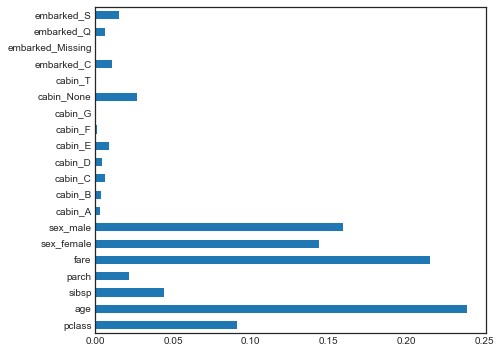

In [56]:
# Version sencilla de mostrar todas las variables
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False)
feature_importances.plot(kind="barh", figsize=(7,6))

## Parametros para tener en cuenta y probar en el clasificador

### Parametros que permiten hacer un modelo mejor
- n_estimators: El número de árboles en el bosque. Escoger números altos tanto como el computador pueda manejarlos
- max_features: El numero de predictores a considerar cuando se busca la mejor división. Probar con "auto", "None", "sqrt", "log2", 0.9 y 0.2
- min_samples_leaf: El número mínimo de muestras en las nuevas hojas creadas. Probar con 1, 2, 3. Si 3 es el mejor intentar con 1 hasta 10.

### Parametros que permiten entrenar el modelo más facilmente
- n_jobs: Determina si multiples procesadores deberían ser utilizados para entrenar y validar el modelo. Siempre definalo como -1 para utilizar todos los disponibles.
  Si se ajusta a 1 y se utiliza el commando %%timeit para medir el tiempo, este deberia ser mas lento cuando se entrenan muchos árboles.

In [106]:
# n_jobs
%timeit
model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [89]:
# %timeit for _ in range(1000): True

27.1 µs ± 791 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [88]:
# Utilizando todos los preocesadores
%timeit
model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [96]:
# n_estimators
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(n_estimators=trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X,y)
    print(trees, "trees")
    roc = roc_auc_score(y, model.oob_prediction_)
    print("C-stat: ", roc)
    results.append(roc)
    print("")

30 trees
C-stat:  0.853870407652

50 trees
C-stat:  0.860698345743

100 trees
C-stat:  0.863521128261

200 trees
C-stat:  0.862192290076

500 trees
C-stat:  0.863739494456

1000 trees
C-stat:  0.864043076726

2000 trees
C-stat:  0.863449227197



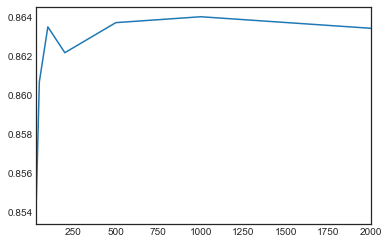

In [97]:
# Gráficamos
pd.Series(results, n_estimator_options).plot()

auto option
C-stat:  0.864043076726

None option
C-stat:  0.864043076726

sqrt option
C-stat:  0.86337466313

log2 option
C-stat:  0.86337466313

0.9 option
C-stat:  0.863534443273

0.2 option
C-stat:  0.86337466313



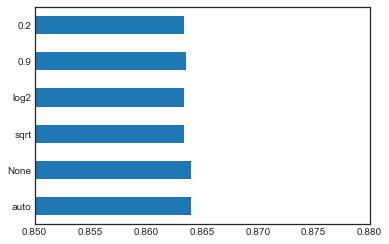

In [98]:
# max_features
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X,y)
    print(max_features, "option")
    roc = roc_auc_score(y, model.oob_prediction_)
    print("C-stat: ", roc)
    results.append(roc)
    print("")

# Gráficamos
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.85, .88))

1 min samples
C-stat:  0.864043076726

2 min samples
C-stat:  0.869654022731

3 min samples
C-stat:  0.871571384442

4 min samples
C-stat:  0.873478094142

5 min samples
C-stat:  0.874269005848

6 min samples
C-stat:  0.874029335634

7 min samples
C-stat:  0.873304998988

8 min samples
C-stat:  0.871866977705

9 min samples
C-stat:  0.869294517411

10 min samples
C-stat:  0.867430415748



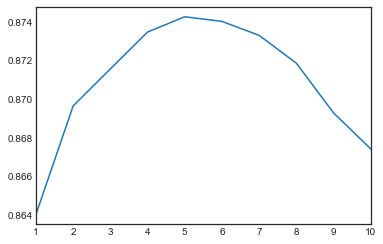

In [100]:
# min_samples_leaf
results = []
min_samples_leaf_options = [1,2,3,4,5,6,7,8,9,10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features="auto", min_samples_leaf=min_samples)
    model.fit(X,y)
    print(min_samples, "min samples")
    roc = roc_auc_score(y, model.oob_prediction_)
    print("C-stat: ", roc)
    results.append(roc)
    print("")

# Gráficamos
pd.Series(results, min_samples_leaf_options).plot()


In [101]:
# Final model
model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features="auto", min_samples_leaf=5)
model.fit(X,y)
roc = roc_auc_score(y, model.oob_prediction_)
print("C-stat: ", roc)

C-stat:  0.874269005848


### Boosting

El algorítmo **Boosting** construye muchos árboles pequeños. A diferencia del Random Forests, 
el _boosting_ consiste en combinar los resultados de varios clasificadores débiles para obtener un clasificador robusto. Cuando se añaden estos clasificadores débiles, se lo hace de modo que estos tengan diferente peso en función de la exactitud de sus predicciones. Luego de que se añade un clasificador débil, los datos cambian su estrucrura de pesos: los casos que son mal clasificados ganan peso y los que son clasificados correctamente pierden peso . Así, los clasificadores débiles se centran de mayor manera en los casos que fueron mal clasificados por los clasificadores débiles.

- Boosting y su variante más usada AdaBoost (Adapting Boosting) genera igual un conjunto de clasificadores. Sin embargo, Adaboost los genera secuencialmente (_Bagging_ los puede generar en paralelo).
- A todos los ejemplos, les asigna inicialmente un peso igual. Cada vez que se genera un clasificador, se cambian los pesos de los nuevos ejemplos usados para el siguiente clasificador. La idea es forzar al nuevo clasificador a minimizar el error esperado. Para esto se les asigna más peso a los ejemplos mal clasificados y menos a los bien clasificados.
- La idea es alentar crear modelos que se vuelvan “expertos” en los datos que no pudieron ser explicados por los modelos anteriores.
- Después de cada interacción los pesos reflejan que tan seguido las instancias han sido mal clasificadas por los clasificadores que se tienen hasta ese momento.
- Se generan igual _T_ clasificadores de muestras de ejemplos pesadas. El clasificador final se forma usando un esquema de votación pesado que depende del desempeño de cada clasificador en su conjunto de entrenamiento.
- Este algoritmo requiere de clasificadores débiles que cambian su estructura con cambios en los datos y que no dan errores mayores al 50%.
- El algoritmo se para cuando el error en los datos de entrenamiento pesados son mayores o iguales a 0.5 o cuando el error es cero (donde todos los pesos de las instancias se vuelven 0).
- Si no se pueden incorporar ejemplos pesados dentro del clasificador, se puede tener un efecto parecido por medio de un muestreo con reemplazo, seleccionando los ejemplos de acuerdo a su peso.

**Algunos detalles a tener en cuenta**
- Se puede tener problemas de _underflow_, por lo que es común eliminar ejemplos con pesos muy pequeños.
- En general, _AdaBoost_ es mejor que _Bagging_, pero no es siempre uniformemente mejor que cada clasificador, mientras que _Bagging_ si.
- _Bagging_ sin _pruning_ o poda a veces reduce el error, _Boosting_ sólo lo aumenta.
- En _Boosting_, si un clasificador tiene error cero, recibe recompensa infinita y es el único ganador, por lo que generalmente se elimina.


In [22]:
regr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
regr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)

zn          0.099287
chas        1.052287
rad         1.355010
indus       1.491162
age         3.824401
crim        4.264827
nox         5.277820
black       6.330616
tax         6.794478
dis         9.577187
ptratio     9.593452
rm         24.748107
lstat      25.591366
dtype: float64


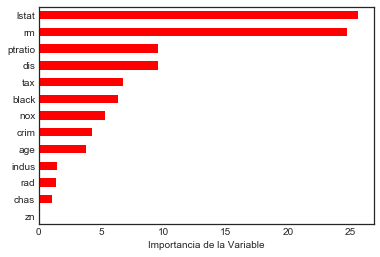

In [23]:
feature_importance = regr.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Importancia de la Variable')
plt.gca().legend_ = None

In [24]:
mean_squared_error(y_test, regr.predict(X_test))

13.69325489022952

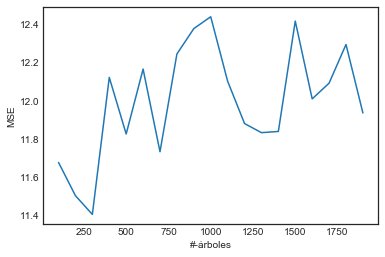

In [17]:
# Gráficaremos la varianza de MSE contra el número de arboles
num_trees = range(100, 2000, 100)
mses = []
for num_tree in num_trees:
    reg = GradientBoostingRegressor(n_estimators=num_tree)
    reg.fit(X_train, y_train)
    ypred = reg.predict(X_test)
    mses.append(mean_squared_error(y_test, ypred))
plt.plot(num_trees, mses)
plt.xlabel("#-árboles")
plt.ylabel("MSE")

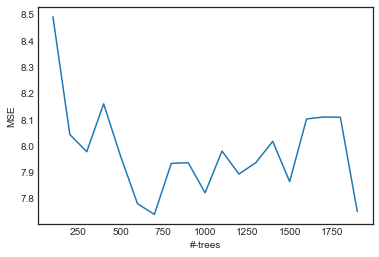

In [16]:
num_trees = range(100, 2000, 100)
mses = []
for num_tree in num_trees:
    reg = GradientBoostingRegressor(n_estimators=num_tree)
    reg.fit(Xr, yr)
    ypred = reg.predict(Xt)
    mses.append(mean_squared_error(yt, ypred))
plt.plot(num_trees, mses)
plt.xlabel("#-trees")
plt.ylabel("MSE")

Como puede observarse con 300 árboles son suficientes para usar en el modelo.

### Bagging y Random Forests en R

``` R
#install.packages("randomForest")
library(randomForest)
set.seed(1)
bag.boston=randomForest(medv~.,data=Boston,subset=train,mtry=13,importance=TRUE)
bag.boston
yhat.bag = predict(bag.boston,newdata=Boston[-train,])
plot(yhat.bag, boston.test)
abline(0,1)
mean((yhat.bag-boston.test)^2)
bag.boston=randomForest(medv~.,data=Boston,subset=train,mtry=13,ntree=25)
yhat.bag = predict(bag.boston,newdata=Boston[-train,])
mean((yhat.bag-boston.test)^2)
set.seed(1)
rf.boston=randomForest(medv~.,data=Boston,subset=train,mtry=6,importance=TRUE)
yhat.rf = predict(rf.boston,newdata=Boston[-train,])
mean((yhat.rf-boston.test)^2)
importance(rf.boston)
varImpPlot(rf.boston)
```

## Información adicional de soporte

- [Presentación en PDF (Inglés)](https://lagunita.stanford.edu/c4x/HumanitiesScience/StatLearning/asset/trees.pdf)

- [Bootstrap Aggregation (Bagging) and Random Forests (Video duración 13:45)](https://www.youtube.com/watch?v=lq_xzBRIWm4)
- [Boosting and Variable Importance (Video duración 12:03)](https://www.youtube.com/watch?v=U3MdBNysk9w)
- [Lab in R: Random Forests and Boosting (Video duración 15:35)](https://www.youtube.com/watch?v=IY7oWGXb77o)

[< Árboles de Decisión](Metodos%20basados%20en%20arboles.ipynb) | [Menú Principal](Aprendizaje%20Estadistico%20y%20Automatico%20con%20Python.ipynb) | [Maquínas de Véctores Soporte >](SVM.ipynb)